In [1]:
import torch
import torchvision.models as models

from image_preprocessing import image_loader, masks_loader, plt_images
from neural_style import run_style_transfer

%matplotlib inline

In [2]:
idx = 1
path = 'examples/'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
imsize = (512, 512) if torch.cuda.is_available() else (128, 128)

#### Get images

In [3]:
style_img = image_loader(path + 'style/tar{}.png'.format(idx), imsize).to(device, torch.float)
content_img = image_loader(path + 'input/in{}.png'.format(idx), imsize).to(device, torch.float)
input_img = content_img.clone()

style_masks, content_masks = masks_loader(
    path + 'segmentation/tar{}.png'.format(idx),
    path + 'segmentation/in{}.png'.format(idx),
    imsize)

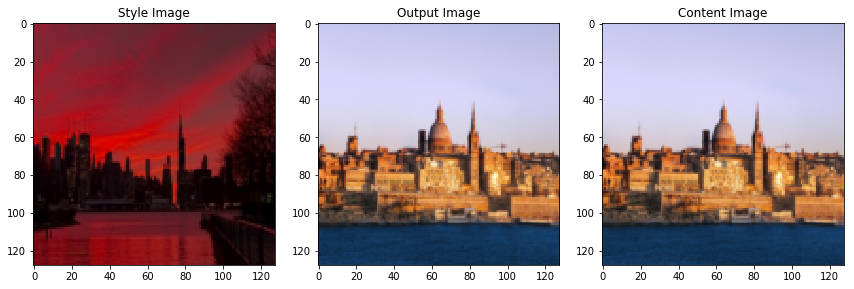

In [4]:
plt_images(style_img, input_img, content_img)

#### Load model

VGG is trained with the following normalization. We use it to normalize our images as well.

In [5]:
vgg = models.vgg19(pretrained=True).features.to(device).eval()

vgg_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
vgg_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

style_layers = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
content_layers = ["conv4_2"]

- - - 

### Pipeline

First, we perform the style transfer without the photorealistic regularization then we add the regularization term.

#### reg=False, num_steps=500

In [6]:
%%time

output = run_style_transfer(
    vgg,
    vgg_normalization_mean,
    vgg_normalization_std,
    style_layers,
    content_layers,
    style_img,
    content_img,
    input_img,
    style_masks,
    content_masks,
    device,
    reg=False,
    style_weight=1e6,
    content_weight=1e4,
    reg_weight=0,
    num_steps=500,
)

step   50: S: 316.772 C: 17.972 R:0.000
step  100: S: 252.724 C: 14.978 R:0.000
step  150: S: 191.234 C: 17.198 R:0.000
step  200: S: 160.888 C: 12.916 R:0.000
step  250: S: 148.809 C: 10.784 R:0.000
step  300: S: 139.937 C: 10.162 R:0.000
step  350: S: 131.326 C: 11.267 R:0.000
step  400: S: 124.389 C: 10.856 R:0.000
step  450: S: 117.974 C: 11.083 R:0.000
step  500: S: 111.896 C: 11.752 R:0.000
CPU times: user 15min 25s, sys: 2min 2s, total: 17min 28s
Wall time: 9min


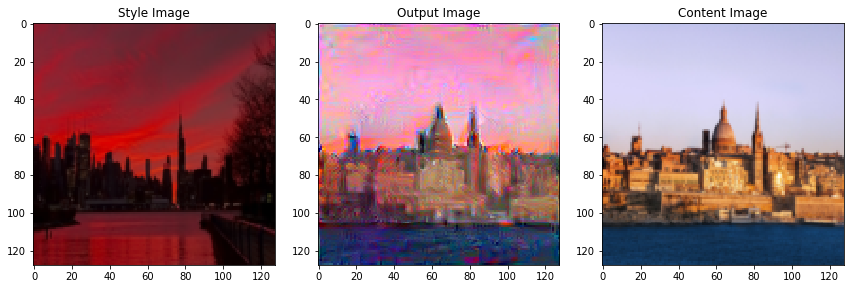

In [7]:
plt_images(style_img, input_img, content_img)

#### reg=True, num_steps=500

In [8]:
%%time

output = run_style_transfer(
    vgg,
    vgg_normalization_mean,
    vgg_normalization_std,
    style_layers,
    content_layers,
    style_img,
    content_img,
    input_img,
    style_masks,
    content_masks,
    device,
    reg=True,
    style_weight=1e6,
    content_weight=1e4,
    reg_weight=1e-4,
    num_steps=500,
)

step   50: S: 104.837 C: 10.062 R:595.480
step  100: S: 100.922 C: 9.713 R:549.505
step  150: S: 98.070 C: 9.747 R:535.216
step  200: S: 95.309 C: 10.207 R:571.898
step  250: S: 93.030 C: 11.290 R:676.807
step  300: S: 89.594 C: 11.142 R:800.245
step  350: S: 86.264 C: 10.367 R:910.450
step  400: S: 84.689 C: 11.178 R:1094.587
step  450: S: 79.600 C: 20.341 R:1134.297
step  500: S: 75.326 C: 10.534 R:1167.287
CPU times: user 15min 31s, sys: 2min 1s, total: 17min 33s
Wall time: 8min 50s


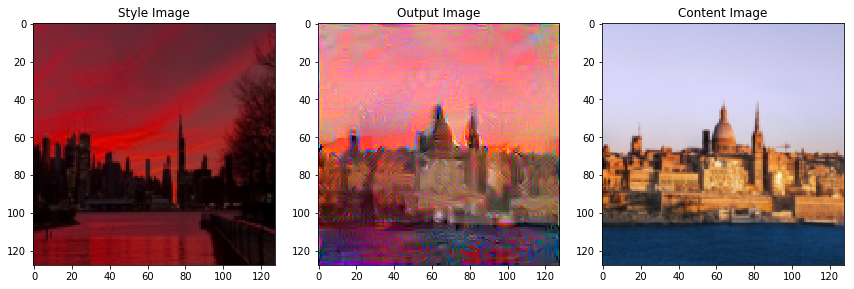

In [9]:
plt_images(style_img, input_img, content_img)